## Modular notebook for team 4


### Create virtual environment
In terminal, command prompt (Menu: Terminal > New Terminal > cmd):
- `python -m venv .venv`
- `.venv\Scripts\activate`

The path of your working directory should now start with (.venv')

### Installing the libraries from the requirements file
- `pip install -r requirements.txt`


### SQL query

#### Module with templates for SQL queries

In [7]:
# Simple query with condition to get the restaurant name from the table 'restaurants' when the rating is more than 4
query_simple = """
    SELECT
        name
    FROM
        menu_items_2
    WHERE
        price > 100;
"""

# Triple join query with condition to get locations offering kapsalons.
query_triple_join_condition = """
    SELECT
        DISTINCT(locations.name)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
        JOIN menu_items ON restaurants.id = menu_items.restaurant_id
    WHERE
        menu_items.name LIKE 'kapsalon';
"""

# Triple join query with condition to get locations offering kapsalons --> calculate average price per location for the 'kapsalons'.
query_triple_join_condition_aggregation = """
SELECT
    locations.name, locations.longitude, locations.latitude, 
    AVG(CASE WHEN menu_items.name LIKE '%kapsalon%' THEN menu_items.price ELSE NULL END) AS avg_price_per_location
FROM
    locations
JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
JOIN menu_items ON restaurants.id = menu_items.restaurant_id
WHERE
    menu_items.name LIKE '%kapsalon%'
GROUP BY
    locations.name
ORDER BY
	locations.name;
"""

#### Question 4: Map locations offering kapsalons and their average price.
--> also added the count per location of restaurants having 'kapsalon' on the menu

In [ ]:
query_a4_d = """
    SELECT
        DISTINCT(locations.name)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
        JOIN menu_items ON restaurants.id = menu_items.restaurant_id
    WHERE
        menu_items.name LIKE 'kapsalon';
"""
query_a4_deli = """
SELECT
    locations.name, locations.longitude, locations.latitude, 
    AVG(CASE WHEN menu_items.name LIKE '%kapsalon%' THEN menu_items.price ELSE NULL END) AS avg_price_per_location,
    COUNT(CASE WHEN menu_items.name LIKE '%kapsalon%' THEN restaurants.id ELSE NULL END) AS count_per_location
FROM
    locations
JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
JOIN menu_items ON restaurants.id = menu_items.restaurant_id
WHERE
    menu_items.name LIKE '%kapsalon%'
GROUP BY
    locations.id
ORDER BY
	locations.id;
"""

query_a4_take = """
    SELECT
        DISTINCT(locations.city)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.ID = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.primarySlug
        JOIN menuItems ON restaurants.primarySlug = menuItems.primarySlug
    WHERE
        menuItems.name LIKE 'Kapsalon';
"""

query_a4_uber = """
    SELECT
        DISTINCT(locations.name)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
        JOIN menu_items ON restaurants.id = menu_items.restaurant_id
    WHERE
        menu_items.name LIKE 'Kapsalon';
"""

#### Question B.3: Where are the delivery ‘dead zones’—areas with minimal restaurant coverage?

In [ ]:
query_4_d = """
    SELECT
        DISTINCT(locations.name)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
        JOIN menu_items ON restaurants.id = menu_items.restaurant_id
    WHERE
        menu_items.name LIKE 'kapsalon';
"""
query_b3_deli = """
SELECT
    locations.id, locations.name, locations.longitude, locations.latitude,
    COUNT(locations_to_restaurants.restaurant_id) AS count_per_location
FROM
    locations

JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id

GROUP BY
    locations.id
ORDER BY
	locations.name;
"""

query_a4b3_deli = """
SELECT
    locations.id, locations.name, locations.longitude, locations.latitude,
    COUNT(restaurants.id) AS count_per_location
FROM
    locations
JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
JOIN menu_items ON restaurants.id = menu_items.restaurant_id

WHERE
    menu_items.name LIKE '%kapsalon%' OR menu_items.name LIKE '%Kapsalon%' 

GROUP BY
    locations.id

ORDER BY
	locations.name;
"""

query = """
        SELECT DISTINCT restaurants.id, restaurants.name

        FROM
        restaurants
        JOIN menu_items ON restaurants.id = menu_items.restaurant_id
        JOIN locations_to_restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
        JOIN locations ON locations_to_restaurants.location_id = locations.id

        WHERE
            menu_items.name LIKE '%kapsalon%' OR menu_items.name LIKE '%Kapsalon%' 
        
        GROUP BY
            restaurants.id

        ORDER BY
            restaurants.id;
"""

query_4_take = """
    SELECT
        DISTINCT(locations.city)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.ID = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.primarySlug
        JOIN menuItems ON restaurants.primarySlug = menuItems.primarySlug
    WHERE
        menuItems.name LIKE 'Kapsalon';
"""

query_4_uber = """
    SELECT
        DISTINCT(locations.name)
    FROM
        locations
        JOIN locations_to_restaurants ON locations.id = locations_to_restaurants.location_id
        JOIN restaurants ON locations_to_restaurants.restaurant_id = restaurants.id
        JOIN menu_items ON restaurants.id = menu_items.restaurant_id
    WHERE
        menu_items.name LIKE 'Kapsalon';
""" 

#### Query B1. How do delivery fees vary across platforms and locations?

In [179]:
query_b1_deliveroo = """
                    SELECT
                        locations_to_restaurants.location_id,
                        AVG(restaurants.delivery_fee) AS avg_delivery_fee
                    FROM
                        restaurants
                    JOIN
                        locations_to_restaurants ON restaurants.id = locations_to_restaurants.restaurant_id
                    GROUP BY
                        locations_to_restaurants.location_id;
"""

query_b1_takeaway = """
                    SELECT
                        locations_to_restaurants.location_id,
                        AVG(restaurants.deliveryFee) AS avg_delivery_fee
                    FROM
                        restaurants
                    JOIN
                        locations_to_restaurants ON restaurants.primarySlug = locations_to_restaurants.restaurant_id
                    GROUP BY
                        locations_to_restaurants.location_id;
                    """


#### Quick check

In [180]:
import sqlite3
import pandas as pd
# database_paths
deliveroo_db = r"..\databases\deliveroo.db"
takeaway_db = r"..\databases\takeaway.db"
ubereats_db = r"..\databases\ubereats.db"

# set the variables for query and database
database = takeaway_db


# Connect to the deliveroo database
connection = sqlite3.connect(database)

results = pd.read_sql_query(query_b1_takeaway, connection)

print(results)

      location_id  avg_delivery_fee
0               0          2.873030
1               1          1.464118
2               2          3.235789
3               3          1.061837
4               4          0.722619
...           ...               ...
2488         2500          3.998000
2489         2501          2.365000
2490         2502          4.934375
2491         2503          1.500000
2492         2504          2.962813

[2493 rows x 2 columns]


#### Queries to manipulate the tables
- For instance: create new table to fix the issue with the price data type

In [ ]:
query_create_table="""
CREATE TABLE menu_items_2(
                      id INTEGER,
                      restaurant_id INTEGER,
                      categorie_id INTEGER,
                      alcohol BOOLEAN,
                      name TEXT,
                      description TEXT,
                      price FLOAT,
                      FOREIGN KEY(restaurant_id) REFERENCES restaurants(id),
                      FOREIGN KEY(categorie_id) REFERENCES categories(categorie_id),
                      PRIMARY KEY(id, restaurant_id)
                      );
"""

query_insert = """
            INSERT INTO 
                menu_items_2(id, restaurant_id, categorie_id, alcohol, name, description, price)
            SELECT 
                id, restaurant_id, categorie_id, alcohol, name, description, price FROM menu_items;
"""

query_drop_table = """
            DROP TABLE
                menu_items;
"""

query_rename_table = """
            ALTER TABLE 
                menu_items_2 
            RENAME TO 
                menu_items;
                """
query_update_poi = """
SELECT
    locations.id, locations.name, locations.longitude, locations.latitude
FROM
    locations
WHERE
    name = "0";
"""

### Connect to the database and excute the query (here for Deliveroo)

In [ ]:
import sqlite3
import pandas as pd

# Connect to the deliveroo database
connection = sqlite3.connect(r"..\databases\deliveroo.db")

# Create cursor object
cursor = connection.cursor()

# Execute query (select the query variable, the SQL code is in code cell above)
cursor.execute(query_update_poi)

# Get all the records that match the query and assign to a variable 'results'
results = cursor.fetchall()

# Close the connection to the database (this may help avoiding database locks)
cursor.close()

# Display the results, so you know if it worked
# Formatting will be a list. See below to create a dataframe from the result
print(type(results))
print(results)


<class 'list'>
[(23, '0', 3.091891551, 51.11274523), (25, '0', 5.42723415, 51.20955004), (37, '0', 3.308393904, 50.85514726), (51, '0', 3.72268103, 51.07644338), (55, '0', 5.704037243, 50.92413361), (70, '0', 5.000061773, 51.16225139), (73, '0', 4.043479832, 50.89525392), (75, '0', 3.87833751, 50.84453234), (76, '0', 3.858579599, 50.85179549), (77, '0', 3.989018348, 50.87473326), (78, '0', 3.905063355, 50.73964926), (86, '0', 2.704963435, 50.96769601), (88, '0', 5.50874308, 50.76223208), (89, '0', 5.478464503, 50.88633569), (90, '0', 5.849206619, 50.75255561), (111, '0', 4.000482948, 50.81383065), (115, '0', 2.907084011, 50.99651373), (136, '0', 3.795903492, 50.83269862), (161, '0', 4.549268014, 50.88572467), (164, '0', 5.100078879, 51.33720152), (177, '0', 5.468276235, 50.77375998), (193, '0', 3.128511788, 51.08367837), (216, '0', 3.257878614, 50.81841128), (217, '0', 5.588937003, 51.18862799), (222, '0', 3.272953124, 50.86415283), (223, '0', 2.926543421, 51.14939897), (255, '0', 5.50

### Connect to the database and excute the query (here for Deliveroo) --> method read_sql_query

In [181]:
import sqlite3
import pandas as pd


# database_paths
deliveroo_db = r"..\databases\deliveroo.db"
takeaway_db = r"..\databases\takeway.db"
ubereats_db = r"..\databases\ubereats.db"

# set the variables for query and database
database = deliveroo_db

# Connect to the deliveroo database
connection = sqlite3.connect(database)

# Execute queries and assign to dataframe
df_a4_deli = pd.read_sql_query(query_a4_deli, connection)
df_b3_deli = pd.read_sql_query(query_b3_deli, connection)
df_a4b3_deli = pd.read_sql_query(query_a4b3_deli, connection)
df_b1_deliveroo = pd.read_sql_query(query_b1_deliveroo, connection)

# Close the connection to the database (this may help avoiding database locks)
connection.close()

# Print the whole shebang
print("Query df_a4_deli: ", df_a4_deli.head())
print("Query df_b3_deli: ", df_b3_deli.head())
print("Query df_a4b3_deli: ", df_a4b3_deli.head())
print("Query df_b1_deliveroo: ", df_b1_deliveroo.head())

Query df_a4_deli:                      name  longitude   latitude  avg_price_per_location  \
0  *1, Nekkersberglaan,    3.698153  51.044716                9.384459   
1  *1, Pottelberg, Kortr   3.257879  50.818411                9.810870   
2  *10, Kortewinkel, Sin   3.224465  51.212660               10.026471   
3  *103-106, Ferdinand L   3.739833  51.045974                9.232692   
4  *124, Abdijstraat, Ki   4.382976  51.188134                8.137467   

   count_per_location  
0                  74  
1                  23  
2                  34  
3                  78  
4                  75  
Query df_b3_deli:       id                   name  longitude   latitude  count_per_location
0  1310  *1, Kanunnik Decoenep   3.287263  51.212460                   4
1  1165  *1, Kloosterstraat, L   5.078405  50.754403                   1
2   592  *1, Nekkersberglaan,    3.698153  51.044716                 437
3  2393  *1, Pachthofstraat, G   4.050039  50.984039                   2
4   216 

#### Create a plot to view the high-density areas and the dead zones.


In [185]:
df_agg = df_b1_deliveroo
column = "avg_delivery_fee"

minimum = df_agg[column].min()
maximum = df_agg[column].max()
som = df_agg[column].sum()

print("Minimum value: ", minimum)
print("Maximum value: ", maximum)
print("Totaal: ", som)


Minimum value:  4.536363636363637
Maximum value:  4.990526315789474
Totaal:  2659.3053365180604


<Axes: ylabel='count_per_location'>

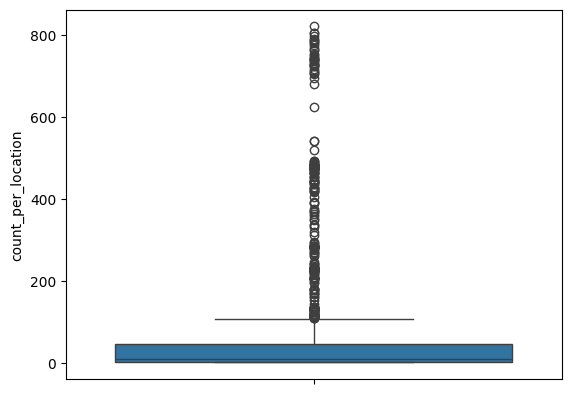

In [ ]:
import seaborn as sns
sns.boxplot(data=df_b3_deli, y='count_per_location')

In [99]:
import folium
import pandas as pd
import branca

df = df_b3_deli

# Step : Define count ranges and assign colors
def price_color(count):
    if count < 30:
        return 'green'
    elif count < 100:
        return 'orange'
    elif count < 300:
        return 'red'
    else:
        return 'darkred'

# Step : Create a map with Folium
m = folium.Map(location=[50.5039, 4.4699], zoom_start=8)  # Centered on Belgium

# Step : Adding markers for each point of interest with count per location information
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # You can adjust the size of the marker based on the average price
        popup=f"PoI Name: {row['name']}<br>Restaurants: {row['count_per_location']}",
        color=price_color(row['count_per_location']),  # Use the function to determine the color
        fill=True,
        fill_color=price_color(row['count_per_location']),
        fill_opacity=0.6
    ).add_to(m)

# Step : Create a legend
color_scale = branca.colormap.StepColormap(['green', 'orange', 'red', 'darkred'], 
                                             vmin=0, vmax=821, 
                                             index=[0, 30, 100, 300, 821], 
                                             caption='Number of restaurants around PoI')

# Add the legend to the map
color_scale.add_to(m)

# Step : Save the map to an HTML file
m.save("../assets/geo/count_per_location_map.html")

# You can now open the HTML file to see the map




#### Code for map with count of restaturants with kapsalon on the menu per location

In [ ]:
import folium
import pandas as pd
import branca

df = df_a4b3_deli

# Step 2: Calculate the average price for each locality name
postal_avg_price = df.groupby('locality_name').agg({
    'Price': 'mean',
    'latitude': 'mean',    # Take the average coordinates for each group of locality names
    'longitude': 'mean'
}).reset_index()

# Step : Define count ranges and assign colors
def price_color(count):
    if count < 10:
        return 'green'
    elif count < 30:
        return 'orange'
    elif count < 100:
        return 'red'
    else:
        return 'darkred'

# Step : Create a map with Folium
m = folium.Map(location=[50.5039, 4.4699], zoom_start=8)  # Centered on Belgium

# Step : Adding markers for each point of interest with count per location information
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # You can adjust the size of the marker based on the average price
        popup=f"PoI Name: {row['name']}<br>Restaurants: {row['count_per_location']}",
        color=price_color(row['count_per_location']),  # Use the function to determine the color
        fill=True,
        fill_color=price_color(row['count_per_location']),
        fill_opacity=0.6
    ).add_to(m)

# Step : Create a legend
color_scale = branca.colormap.StepColormap(['green', 'orange', 'red', 'darkred'], 
                                             vmin=0, vmax=206, 
                                             index=[0, 10, 30, 100, 206], 
                                             caption='Number of restaurants around PoI')

# Add the legend to the map
color_scale.add_to(m)

# Step : Save the map to an HTML file
m.save("../assets/geo/kapsalon_count_per_location_map.html")

# You can now open the HTML file to see the map




#### Code for map with count of restaturants with kapsalon on the menu per location

In [ ]:
import folium
import pandas as pd
import branca

df = df_a4b3_deli

# Step : Define count ranges and assign colors
def price_color(count):
    if count < 10:
        return 'green'
    elif count < 30:
        return 'orange'
    elif count < 100:
        return 'red'
    else:
        return 'darkred'

# Step : Create a map with Folium
m = folium.Map(location=[50.5039, 4.4699], zoom_start=8)  # Centered on Belgium

# Step : Adding markers for each point of interest with count per location information
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # You can adjust the size of the marker based on the average price
        popup=f"PoI Name: {row['name']}<br>Restaurants: {row['count_per_location']}",
        color=price_color(row['count_per_location']),  # Use the function to determine the color
        fill=True,
        fill_color=price_color(row['count_per_location']),
        fill_opacity=0.6
    ).add_to(m)

# Step : Create a legend
color_scale = branca.colormap.StepColormap(['green', 'orange', 'red', 'darkred'], 
                                             vmin=0, vmax=206, 
                                             index=[0, 10, 30, 100, 206], 
                                             caption='Number of restaurants around PoI')

# Add the legend to the map
color_scale.add_to(m)

# Step : Save the map to an HTML file
m.save("../assets/geo/kapsalon_count_per_location_map.html")

# You can now open the HTML file to see the map




#### Attempt to reverse locate the POI

In [53]:
from geopy.geocoders import Nominatim
import time

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapi_exercises")

# Function to fetch POI for a coordinate
def get_poi(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.raw['display_name']
    except Exception as e:
        return f"Error: {e}"
print(results)
# Fetch POI for all locations
results_list = [] # Create empty list, to transfer the data from tuples into the list.

for id, name, lon, lat in results:
    time.sleep(1)  # To respect API rate limits
    name = get_poi(lat, lon)
    results_list.append((id, name, lon, lat)) # create a new tuple with the updated values 
    print(f"POI for ({id}, {lat}, {lon}): {name}")

print(results_list)
print(type(results_list[0]))

[(23, '0', 3.091891551, 51.11274523), (25, '0', 5.42723415, 51.20955004), (37, '0', 3.308393904, 50.85514726), (51, '0', 3.72268103, 51.07644338), (55, '0', 5.704037243, 50.92413361), (70, '0', 5.000061773, 51.16225139), (73, '0', 4.043479832, 50.89525392), (75, '0', 3.87833751, 50.84453234), (76, '0', 3.858579599, 50.85179549), (77, '0', 3.989018348, 50.87473326), (78, '0', 3.905063355, 50.73964926), (86, '0', 2.704963435, 50.96769601), (88, '0', 5.50874308, 50.76223208), (89, '0', 5.478464503, 50.88633569), (90, '0', 5.849206619, 50.75255561), (111, '0', 4.000482948, 50.81383065), (115, '0', 2.907084011, 50.99651373), (136, '0', 3.795903492, 50.83269862), (161, '0', 4.549268014, 50.88572467), (164, '0', 5.100078879, 51.33720152), (177, '0', 5.468276235, 50.77375998), (193, '0', 3.128511788, 51.08367837), (216, '0', 3.257878614, 50.81841128), (217, '0', 5.588937003, 51.18862799), (222, '0', 3.272953124, 50.86415283), (223, '0', 2.926543421, 51.14939897), (255, '0', 5.50833062, 50.8738

POI for (23, 51.11274523, 3.091891551): Aartrijksestraat, Aartrijke, Zedelgem, Brugge, West-Vlaanderen, Vlaanderen, 8211, België / Belgique / Belgien
POI for (25, 51.20955004, 5.42723415): WICO Campus Overpelt, Windmolenstraat, Overpelt, Pelt, Maaseik, Limburg, Vlaanderen, 3900, België / Belgique / Belgien
POI for (37, 50.85514726, 3.308393904): 86, Marktstraat, 't Eiland, Harelbeke, Kortrijk, West-Vlaanderen, Vlaanderen, 8530, België / Belgique / Belgien
POI for (51, 51.07644338, 3.72268103): 80, Limbastraat, Muide, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien
POI for (55, 50.92413361, 5.704037243): 2, Groenplaats, Oud-Rekem, Rekem, Lanaken, Tongeren, Limburg, Vlaanderen, 3621, België / Belgique / Belgien
POI for (70, 51.16225139, 5.000061773): 117-123, De-Billemontstraat, Holven, Geel, Turnhout, Antwerpen, Vlaanderen, 2440, België / Belgique / Belgien
POI for (73, 50.89525392, 4.043479832): Drieselken, Welle, Denderleeuw, Aalst, Oost-Vlaanderen, Vlaanderen, 94

In [ ]:
# Define the table name, column, and values for the update
table_name = "locations"
update_column = "name"
condition_column = "id"

# Write the UPDATE SQL query
update_query = f"""
UPDATE {table_name}
SET {update_column} = ?
WHERE {condition_column} = ?
"""
import sqlite3

# Connect to the deliveroo database
connection = sqlite3.connect(r"..\databases\deliveroo.db")

# Create cursor object
cursor = connection.cursor()

for id, name, lon, lat in results_list:
    try:
        # Execute the query with values
        cursor.execute(update_query, (f"*{name[:20]}", id)) # query, new value for update_column, condition for condition_column
        
        # Commit the transaction
        connection.commit()

    except sqlite3.Error as e:
        print(f"An error occurred: {e}")

# Close the connection
cursor.close()
connection.close()

Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated successfully!
Record updated

### Create pandas dataframe from the results list

In [ ]:
import pandas as pd

# Add column names to a list variable named 'columns'
# The number of column names should match the number of columns you pulled from the database. For instance the  'query_triple_join_condition_aggregation' pulls 4 columns.
columns_a4 = ["POI id", "POI name", "longitude","latitude","avg_price_kapsalon","count_kapsalon"]

# Create the dataframe
df_a4 = pd.DataFrame(results, columns = columns_a4)

# Display the first 5 rows with the head() method + print
print(df_a4.head())

In [32]:
import pandas as pd

# Add column names to a list variable named 'columns'
# The number of column names should match the number of columns you pulled from the database. For instance the  'query_triple_join_condition_aggregation' pulls 4 columns.
columns_b3 = ["POI id", "POI name", "longitude","latitude","restaurant_count"]

# Create the dataframe
df_b3 = pd.DataFrame(results, columns = columns_b3)

# Display the first 5 rows with the head() method + print
print(df_b3.head(10))

   POI id POI name  longitude   latitude  restaurant_count
0      23        0   3.091892  51.112745                 1
1      37        0   3.308394  50.855147                 4
2      51        0   3.722681  51.076443               294
3      73        0   4.043480  50.895254                 6
4      77        0   3.989018  50.874733                 3
5     161        0   4.549268  50.885725                20
6     164        0   5.100079  51.337202                 4
7     216        0   3.257879  50.818411               114
8     222        0   3.272953  50.864153                 3
9     284        0   5.214176  50.820239                19


### Create a static map of Belgium with 1 value

In [8]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
from shapely.geometry import Point


Text(0.5, 1.0, 'Average kapsalon prices in Belgium')

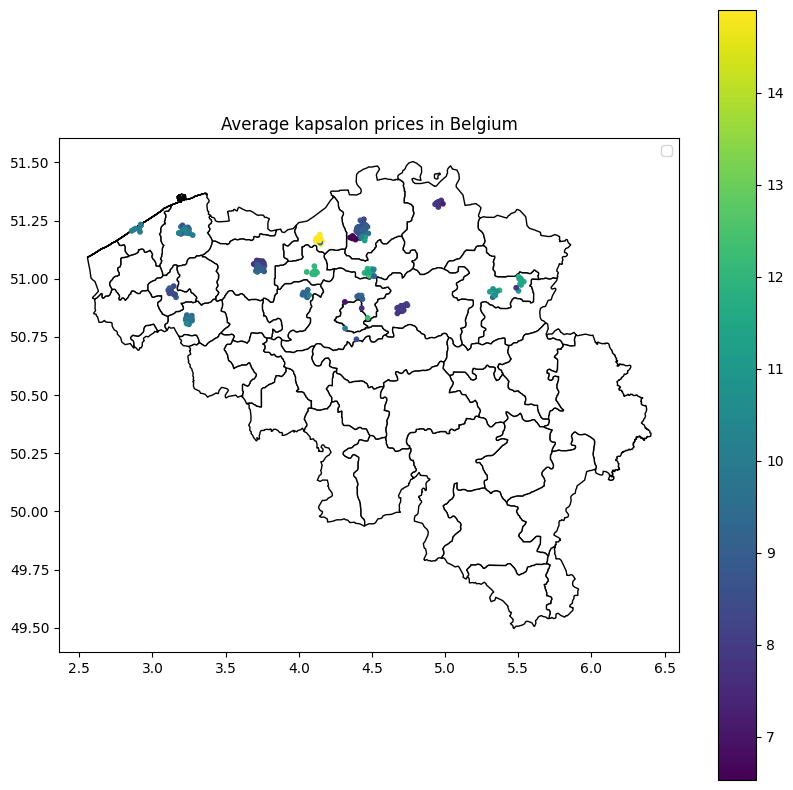

In [10]:
# Load data (already done above)

# Creating point geometry with Longitude and Latitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Setting the reference frame (CRS), e.g. EPSG:4326
gdf.set_crs(epsg=4326, inplace=True)

# Load administrative boundaries (e.g. Belgium)
# Replace 'path/to/belgium_shapefile.shp' with the path to your file
# Downloaded from: https://gadm.org/download_country.html#google_vignette
borders = gpd.read_file(r"..\assets\geo\gadm41_BEL_3.shp")

# Set the frame of reference for the boundaries if different (for example EPSG:4326)
#borders = borders.to_crs(epsg=4326)

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))

# Draw administrative boundaries on the map
borders.plot(ax = ax, color='white', edgecolor='black', linewidth=1) 

# Draw price points (Price)
scatter = gdf.plot(ax=ax, 
                   column='avg_price_kapsalon', 
                   cmap='viridis',  # Color map
                   legend=True, 
                   markersize=10)

# Add a legend
handles, labels = scatter.get_legend_handles_labels()
ax.legend(handles, [f'{int(float(label))}' for label in labels])


plt.title('Average kapsalon prices in Belgium')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.grid()
#plt.show()

### Interactive map of Belgium

In [ ]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Remove rows that have NaN in the latitude or longitude columns
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create a map with the appropriate center
properties = folium.Map(location=[df_clean['latitude'].mean(), df_clean['longitude'].mean()], zoom_start=10)

folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap').add_to(properties)

# Add MarkerCluster to improve performance with large numbers of markers
marker_cluster = MarkerCluster().add_to(properties)

# Add tags to the cluster
for index, row in df_clean.iterrows():
    # This is where you add the text and values you want to display on click
    text = f"""
    Price: {round(row.avg_price_kapsalon,2)} €<br>
    Count: {row.count_kapsalon}<br>   
    """
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=folium.Popup(text, max_width=400),
        tooltip=round(row.avg_price_kapsalon,2) # This is where you add the text and values you want to display on hover over
    ).add_to(marker_cluster)

properties

# Save map to the html
map_path = r"..\assets\geo\map.html"
properties.save(map_path)

# Open map in browser
webbrowser.open(map_path)


True